In [1]:
import numpy as np
import pandas as pd
from astropy.table import Table, vstack
from matplotlib import pyplot as plt, cm as cm, colors as colors, __version__ as mplver
import matplotlib as mpl
from matplotlib.gridspec import GridSpec
from glob import glob
from astropy.timeseries import LombScargle
from astropy.table import Table
from astropy import __version__ as apver
from scipy import stats, __version__ as spver
import warnings
from TESStools import *
from tqdm.notebook import tqdm

In [2]:
massive_observed = pd.read_csv('../data/massive_observed.csv')

#here's the YSGs
ysgs = massive_observed[massive_observed['SpT']=='YSG'].set_index('TIC ID')

#here's the RSGs
rsgs = massive_observed[massive_observed['SpT']=='RSG'].set_index('TIC ID')

#Let's get the TIC x-match for Kathryn's 2012 catalog of these stars in the LMC and SMC
ysg_tics = glob('../../Proposals/TESS_C3/data/*YSG_TIC*')
dfs = []
for y in ysg_tics:
    df = pd.read_csv(y,skiprows=4)
    df['SpecSource'] = ['N' for i in range(len(df))]
    if 'SMC' in y:
        df['Gal'] = 'SMC'
    elif 'LMC' in y:
        df['Gal'] = 'LMC'
    else:
        print(y)
    dfs.append(df)
ysg_tic = pd.concat(dfs).reset_index(drop=True)[['MatchID','teff','lum','SpecSource','Gal','w1mag','w2mag','w3mag','w4mag']]
ysg_tic = ysg_tic[ysg_tic['lum'] > 4.0].reset_index(drop=True)
print(len(ysg_tic))
in_box = ysg_tic[(ysg_tic['teff']>=3.6) & 
                (ysg_tic['teff']<=3.9) &
                (ysg_tic['lum']>=8.65 - ysg_tic['teff']) & 
                (ysg_tic['lum']<=9.2 - ysg_tic['teff'])]
print(len(in_box))

rsg_tics = glob('../../Proposals/TESS_C3/data/*RSG_TIC*')
#rsg_tics.append('../../Proposals/TESS_C3/data/galactic_all_TIC.csv')
dfs = []
for r in rsg_tics:
    if 'MC' in r: #only want Kathryn's list
        df = pd.read_csv(r,skiprows=4)
        df['teff'] = np.log10(df['Teff'])
        df['lum'] = df['LogL']
        df['SpecSource'] = ['N' for i in range(len(df))]
        if 'SMC' in r:
            df['Gal'] = 'SMC'
        elif 'LMC' in r:
            df['Gal'] = 'LMC'
        else:
            print(r)
        dfs.append(df)
rsg_tic = pd.concat(dfs).reset_index(drop=True)[['MatchID','teff','lum','SpecSource','RA','Dec','Gal','w1mag','w2mag','w3mag','w4mag']]

rsg_tic = rsg_tic[rsg_tic['lum'] > 4.0].reset_index(drop=True)
print(len(rsg_tic))
in_box = rsg_tic[(rsg_tic['teff']>=3.6) & 
                (rsg_tic['teff']<=3.9) &
                (rsg_tic['lum']>=8.65 - rsg_tic['teff']) & 
                (rsg_tic['lum']<=9.2 - rsg_tic['teff'])]
print(len(in_box))

rsg_tic.set_index('MatchID',inplace=True)
ysg_tic.set_index('MatchID',inplace=True)


#Now cross match and concatenate
ysg_spec = pd.merge(ysgs,ysg_tic,left_index=True,right_index=True).sort_values('teff')
rsg_spec = pd.merge(rsgs,rsg_tic,suffixes=('','_tic'),left_index=True,right_index=True).sort_values('teff')


cool_sgs = pd.concat([ysg_spec,rsg_spec]).sort_values('teff')
cool_sgs.to_csv('neugent_sample.csv')
cool_sgs

621
58
3693
26


/Users/carina/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (19,20,21,23,62,99,128,129) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,...,teff,lum,SpecSource,Gal,w1mag,w2mag,w3mag,w4mag,RA_tic,Dec_tic
179437520,79.971947,-68.067692,0.091019,1.593040,0.205590,9.8540,NaN,RSG,SV* HV 2450,M1,...,3.573452,5.316,N,LMC,6.841,6.993,6.134,4.754,79.971929,-68.067717
404965649,85.373961,-69.415872,0.060785,1.788260,0.708052,11.0373,NaN,RSG,CPD-69 502,NaN,...,3.578295,4.930,N,LMC,8.013,8.161,7.247,5.391,85.374008,-69.415869
40185978,76.968537,-70.434641,0.160504,2.140400,0.216068,11.1070,NaN,RSG,SK -70 80,M0,...,3.587149,4.887,N,LMC,8.254,8.398,8.099,7.782,76.968487,-70.434600
181445828,13.765720,-73.010260,0.236534,0.797799,-1.265550,11.0965,NaN,YSG,PMMR 74,G6Ia-Iab,...,3.603000,5.027,N,SMC,8.741,8.825,8.492,8.396,NaN,NaN
182735393,15.655494,-72.273615,0.085619,0.942084,-1.163470,11.1242,NaN,YSG,PMMR 135,G6.5Ia-Iab,...,3.603000,4.967,N,SMC,8.807,8.863,8.588,8.536,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182730317,16.205624,-72.106040,0.055346,0.664882,-1.272430,11.4480,NaN,YSG,RMC 36,B3:Iak,...,4.044000,5.307,N,SMC,11.204,11.192,11.061,9.228,NaN,NaN
180792170,12.659946,-73.471738,0.058121,0.543531,-1.243180,11.1544,NaN,YSG,HD 5045,B2:I:,...,4.044000,5.435,N,SMC,10.896,10.853,10.681,9.225,NaN,NaN
182905190,16.484663,-72.329100,0.057287,0.986675,-1.257930,11.6057,NaN,YSG,LHA 115-S 45,B1.5Ia:,...,4.058000,5.302,N,SMC,11.192,11.145,10.694,7.014,NaN,NaN
180609595,12.262374,-73.361369,0.051217,0.833683,-1.258340,11.2247,NaN,YSG,HD 4862,B2I,...,4.073000,5.527,N,SMC,10.897,10.912,11.226,9.238,NaN,NaN


In [3]:
ysg_tic

,teff,lum,SpecSource,Gal,w1mag,w2mag,w3mag,w4mag
MatchID,,,,,,,,
276936320,3.984,4.571,N,LMC,11.948,11.918,10.489,9.137
30631011,3.976,4.748,N,LMC,11.780,11.801,11.622,9.229
179248329,3.615,4.466,N,LMC,9.749,9.930,9.673,8.747
31109310,3.806,4.635,N,LMC,10.574,10.589,10.514,9.415
276864600,3.976,5.067,N,LMC,11.015,11.004,10.978,9.981
...,...,...,...,...,...,...,...,...
615329126,3.676,4.488,N,SMC,NaN,NaN,NaN,NaN
615335237,3.646,4.348,N,SMC,NaN,NaN,NaN,NaN
615343917,3.890,4.695,N,SMC,NaN,NaN,NaN,NaN


In [4]:
# Now we're going to xmatch to Helmi et al.

lmc_xmatch = pd.read_csv('../data/GaiaXmatch/lmc_supergiants-result.csv')
smc_xmatch = pd.read_csv('../data/GaiaXmatch/smc_supergiants-result.csv')

gaia_xmatch = pd.concat([lmc_xmatch,smc_xmatch])

joined = pd.merge(cool_sgs,gaia_xmatch,left_index=True,right_on='tic',how='inner').set_index('tic')
joined

,RA,Dec,dist,pmRA,pmDec,Tmag,ContRatio,SpT,CommonName,MKType,...,lum,SpecSource,Gal,w1mag,w2mag,w3mag,w4mag,RA_tic,Dec_tic,source_id
tic,,,,,,,,,,,,,,,,,,,,,
179437520,79.971947,-68.067692,0.091019,1.593040,0.205590,9.8540,NaN,RSG,SV* HV 2450,M1,...,5.316,N,LMC,6.841,6.993,6.134,4.754,79.971929,-68.067717,4658722752228316160
404965649,85.373961,-69.415872,0.060785,1.788260,0.708052,11.0373,NaN,RSG,CPD-69 502,NaN,...,4.930,N,LMC,8.013,8.161,7.247,5.391,85.374008,-69.415869,4657625263503324544
40185978,76.968537,-70.434641,0.160504,2.140400,0.216068,11.1070,NaN,RSG,SK -70 80,M0,...,4.887,N,LMC,8.254,8.398,8.099,7.782,76.968487,-70.434600,4652070290243179776
181445828,13.765720,-73.010260,0.236534,0.797799,-1.265550,11.0965,NaN,YSG,PMMR 74,G6Ia-Iab,...,5.027,N,SMC,8.741,8.825,8.492,8.396,NaN,NaN,4685961808462981248
182735393,15.655494,-72.273615,0.085619,0.942084,-1.163470,11.1242,NaN,YSG,PMMR 135,G6.5Ia-Iab,...,4.967,N,SMC,8.807,8.863,8.588,8.536,NaN,NaN,4687498998758427520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182730317,16.205624,-72.106040,0.055346,0.664882,-1.272430,11.4480,NaN,YSG,RMC 36,B3:Iak,...,5.307,N,SMC,11.204,11.192,11.061,9.228,NaN,NaN,4687507584364583040
180792170,12.659946,-73.471738,0.058121,0.543531,-1.243180,11.1544,NaN,YSG,HD 5045,B2:I:,...,5.435,N,SMC,10.896,10.853,10.681,9.225,NaN,NaN,4685876050900042880
182905190,16.484663,-72.329100,0.057287,0.986675,-1.257930,11.6057,NaN,YSG,LHA 115-S 45,B1.5Ia:,...,5.302,N,SMC,11.192,11.145,10.694,7.014,NaN,NaN,4687488965713758336


In [5]:
#Now let's see how many sectors each lightcurve covers

orbit_times = pd.read_csv('../data/orbit_times_20210629_1340.csv',skiprows=5)
n_sects = []
for tic,star in tqdm(joined.iterrows(), total=len(joined)):
    sectors = []
    lc, lc_smooth = lc_extract(get_lc_from_id(tic), smooth=128)
    time, flux, err = lc['Time'], lc['Flux'], lc['Err']
    for idx,row in orbit_times.iterrows():
        if np.any((time >= row['Start TJD'])&(time <= row['End TJD'])):
            sectors.append(row['Sector'])
    n_sect = len(np.unique(sectors))
    n_sects.append(n_sect)
joined['n_sectors'] = n_sects
joined.to_csv('sample.csv')

  0%|          | 0/201 [00:00<?, ?it/s]

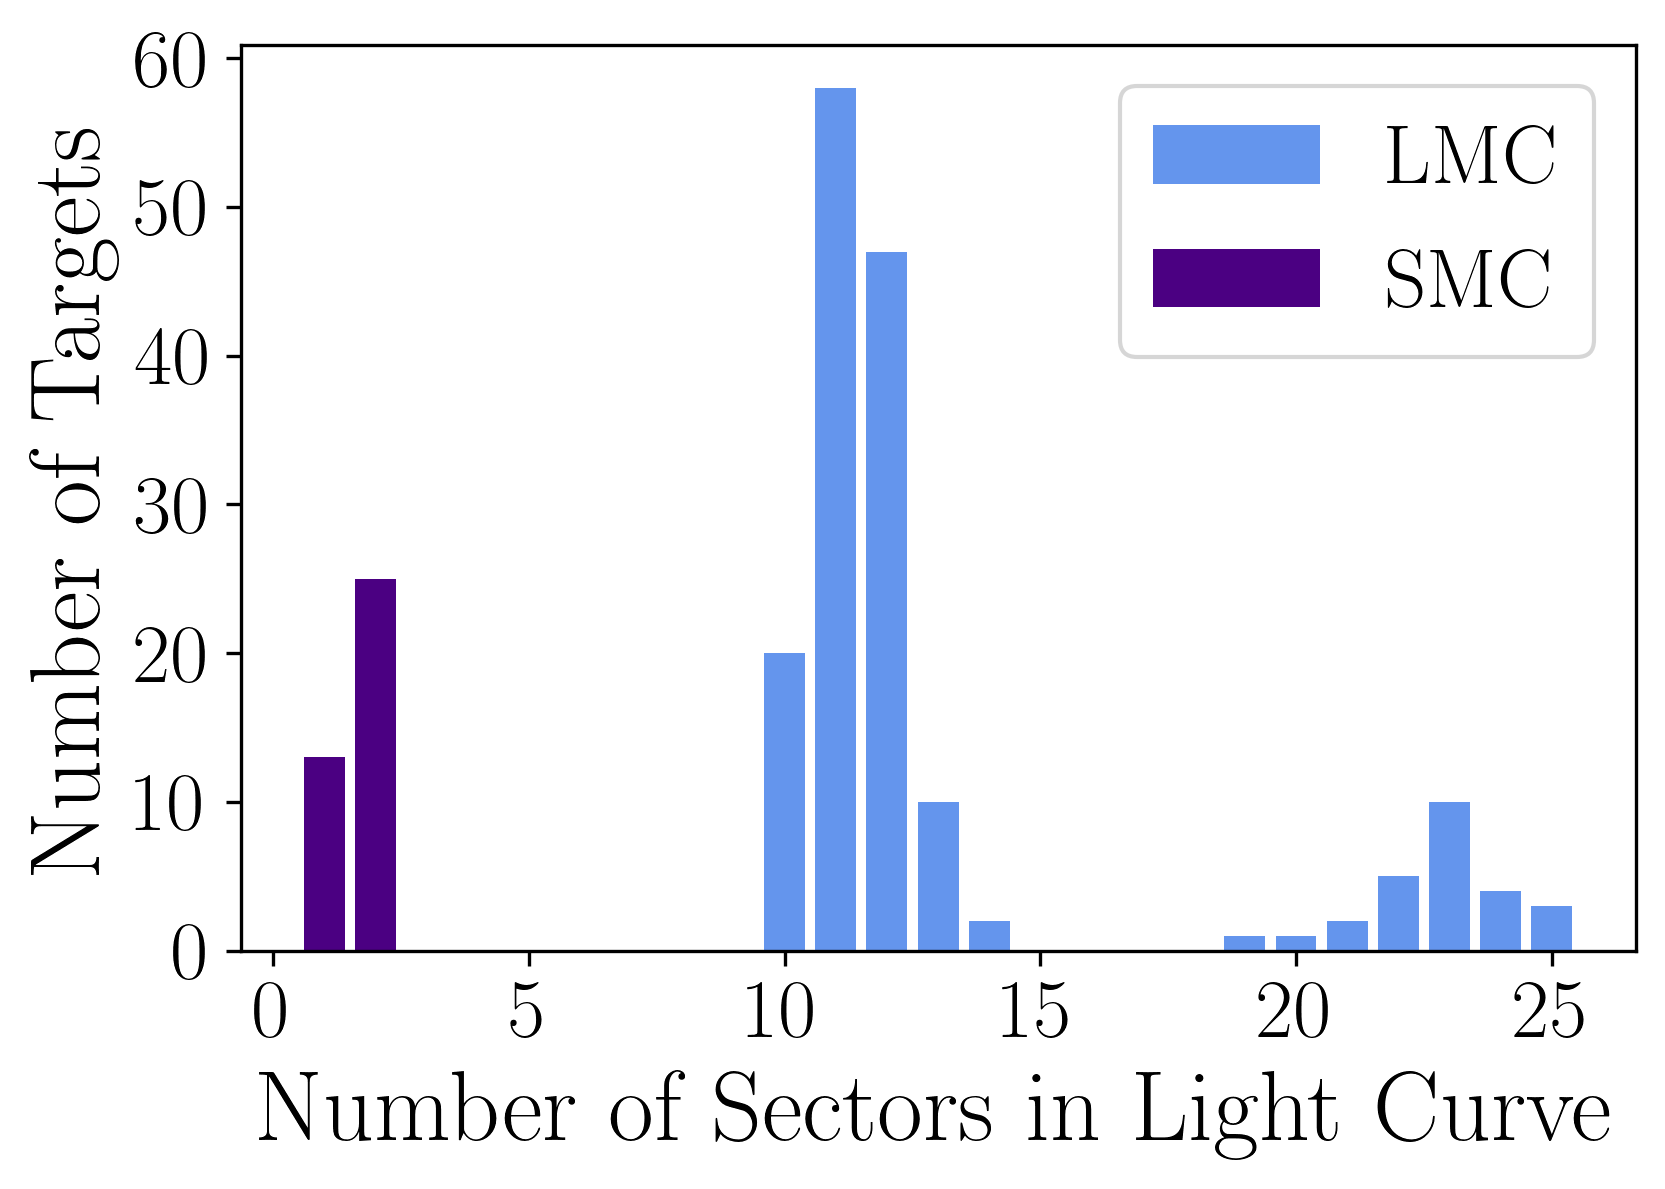

In [6]:
fig = plt.figure(dpi=300)

x_l, y_l = np.unique(joined[joined['Gal'] == 'LMC']['n_sectors'].values,return_counts=True)
plt.bar(x_l, height=y_l, fc='cornflowerblue',label='LMC')

x_s, y_s = np.unique(joined[joined['Gal'] == 'SMC']['n_sectors'].values,return_counts=True)
plt.bar(x_s, height=y_s, fc='indigo',label='SMC')

plt.legend(fontsize=20)

plt.xlabel('Number of Sectors in Light Curve',fontsize=24)
plt.ylabel('Number of Targets',fontsize=24)

for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.savefig('../plots/n_sectors.pdf',bbox_inches='tight')

In [8]:
x_l

array([10, 11, 12, 13, 14, 19, 20, 21, 22, 23, 24, 25])

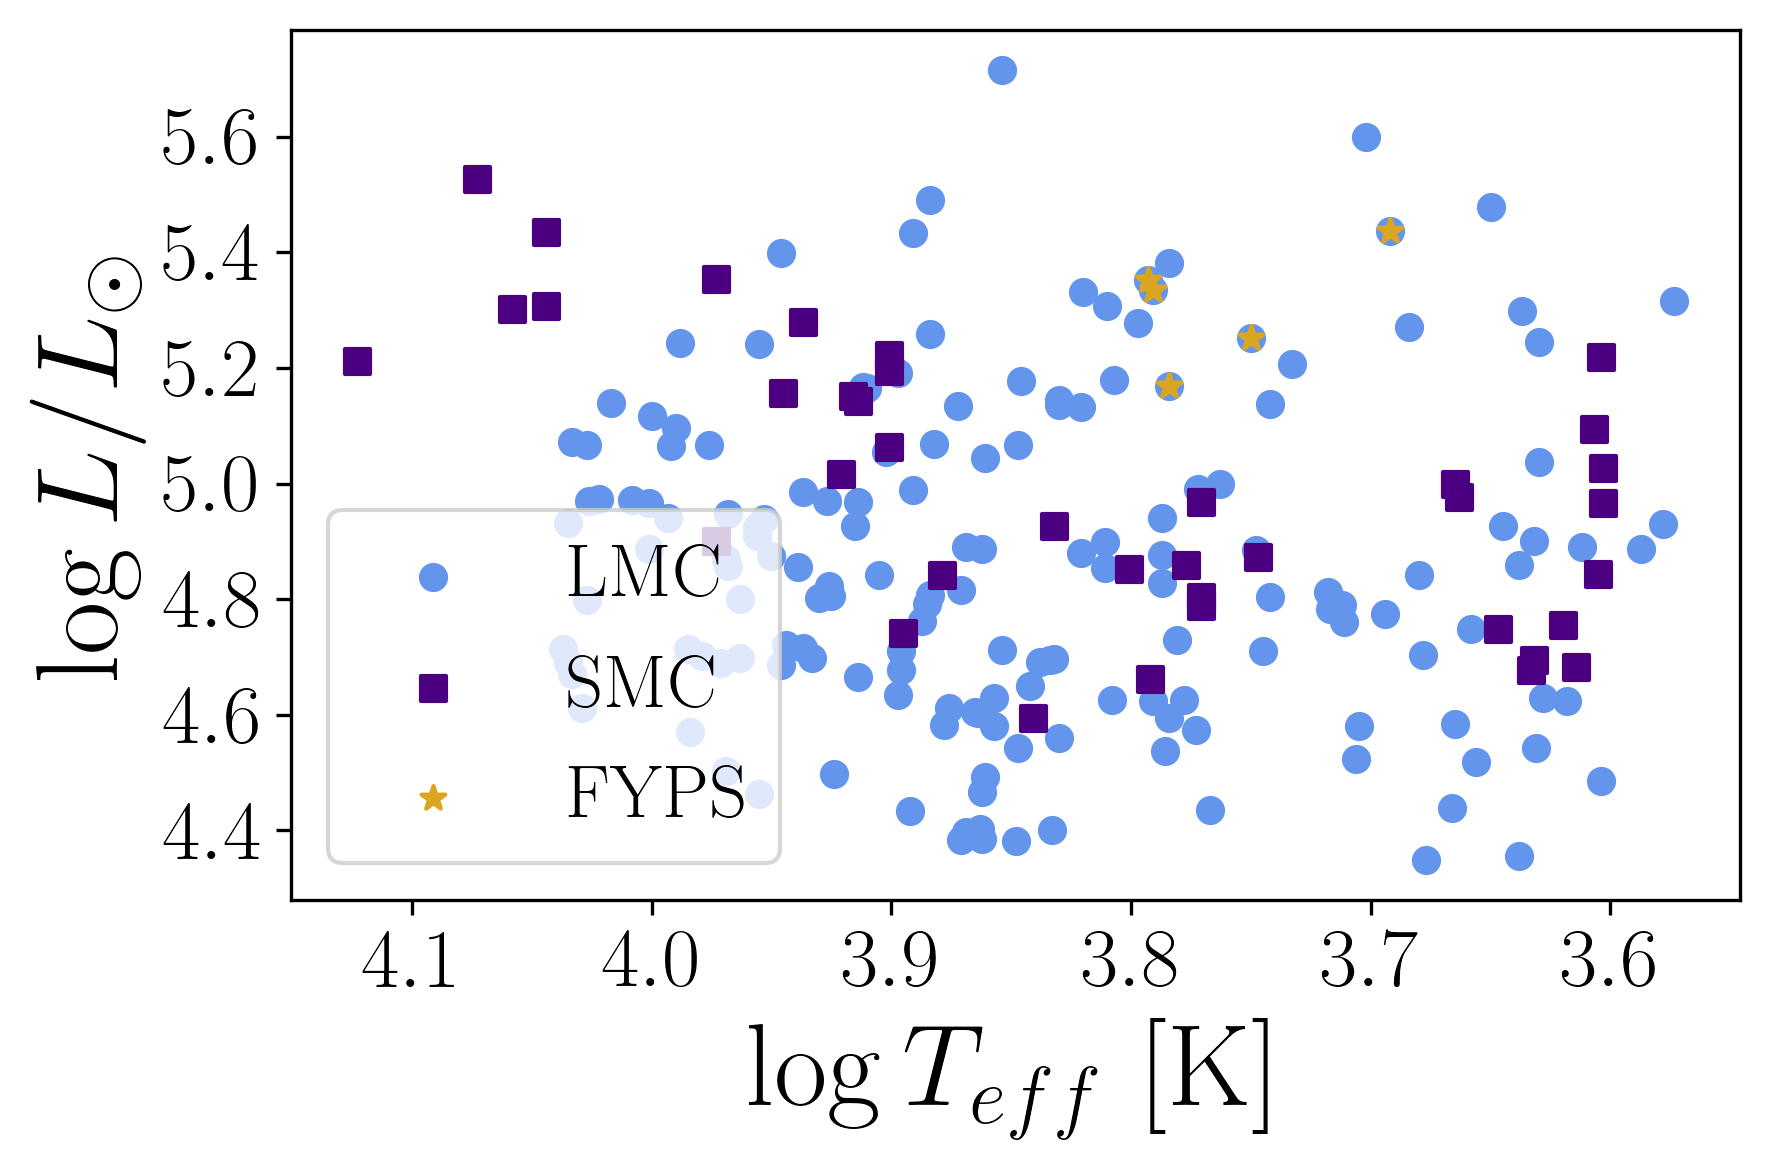

In [9]:
fig = plt.figure(dpi=300)

plt.scatter(joined[joined['Gal']=='LMC']['teff'],joined[joined['Gal']=='LMC']['lum'],marker='o',c='cornflowerblue',label='LMC')
plt.scatter(joined[joined['Gal']=='SMC']['teff'],joined[joined['Gal']=='SMC']['lum'],marker='s',c='indigo',label='SMC')
fyps = pd.read_csv('paper_2020/fyps.csv')
plt.scatter(fyps['teff'],fyps['lum'],marker='*',c='goldenrod',label='FYPS')

plt.gca().invert_xaxis()

plt.legend(fontsize=18,loc='lower left')

plt.xlabel('$\log{T_{eff}}$ [K]')
plt.ylabel('$\log{L/L_\odot}$')

ax= plt.gca()
ax.xaxis.label.set_size(28)
ax.yaxis.label.set_size(28)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)

plt.tight_layout()
#plt.savefig('../plots/cool_sg.pdf')